# **Manipulating and Exploring the Data Set**

In [520]:
import pandas as pd
import numpy as np 
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification

In [521]:
import sys
import numpy
numpy.set_printoptions(threshold=10)
#numpy.set_printoptions(threshold=sys.maxsize)

In [522]:
#import the cvs file
df = pd.read_csv('cardfraud.csv',engine='python')
df.head()

,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,C583110837',3',M',28007',M480139044',28007',es_health',44.26,1
1,C1332295774',3',M',28007',M480139044',28007',es_health',324.50,1
2,C1160421902',3',M',28007',M857378720',28007',es_hotelservices',176.32,1
3,C966214713',3',M',28007',M857378720',28007',es_hotelservices',337.41,1
4,C1450140987',4',F',28007',M1198415165',28007',es_wellnessandbeauty',220.11,1


# **Display Data info**

In [523]:
rowct = df.shape[0]
colct = df.shape[1]

print("There are {} rows and {} columns in this dataset. \n".format(rowct,colct))

print("The datatypes of each column are:")

print(df.dtypes, "\n")

print("All types listed as objects are strings")

There are 144636 rows and 9 columns in this dataset. 

The datatypes of each column are:
customer        object
age             object
gender          object
zipcodeOri      object
merchant        object
zipMerchant     object
category        object
amount         float64
fraud            int64
dtype: object 

All types listed as objects are strings


# **Describing the data**

In [524]:
df.describe()

,amount,fraud
count,144636.000000,144636.000000
mean,56.746424,0.049780
std,218.119863,0.217491
min,0.000000,0.000000
25%,14.210000,0.000000
50%,27.870000,0.000000
75%,44.910000,0.000000
max,8329.960000,1.000000


# **Sorting**

In [525]:
df.sort_values(by = 'customer')

,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
111048,C1000148617',5',M',28007',M1741626453',28007',es_sportsandtoys',16.69,0
137616,C1000148617',5',M',28007',M1823072687',28007',es_transportation',55.14,0
130310,C1000148617',5',M',28007',M1823072687',28007',es_transportation',47.42,0
4086,C1000148617',5',M',28007',M480139044',28007',es_health',323.64,1
141258,C1000148617',5',M',28007',M85975013',28007',es_food',14.84,0
...,...,...,...,...,...,...,...,...,...
4144,C999723254',2',M',28007',M480139044',28007',es_health',268.60,1
143797,C999723254',2',M',28007',M348934600',28007',es_transportation',19.26,0
35783,C999723254',2',M',28007',M1535107174',28007',es_wellnessandbeauty',17.43,0
100990,C999723254',2',M',28007',M1888755466',28007',es_otherservices',101.41,0


In [526]:
df.sort_values(by = 'fraud', ascending = False)

,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,C583110837',3',M',28007',M480139044',28007',es_health',44.26,1
4838,C5191822',1',F',28007',M1888755466',28007',es_otherservices',700.41,1
4808,C2138532527',5',M',28007',M50039827',28007',es_health',695.27,1
4807,C2005070127',2',F',28007',M480139044',28007',es_health',787.14,1
4806,C1051985937',2',F',28007',M480139044',28007',es_health',631.65,1
...,...,...,...,...,...,...,...,...,...
53005,C357634845',3',M',28007',M1823072687',28007',es_transportation',3.32,0
53004,C302774270',2',F',28007',M209847108',28007',es_wellnessandbeauty',111.89,0
53003,C868061193',3',F',28007',M1600850729',28007',es_fashion',18.81,0
53002,C2005671734',2',F',28007',M85975013',28007',es_food',24.23,0


# **View single or more a few columns**

In [527]:
df[['gender', 'fraud']]

,gender,fraud
0,M',1
1,M',1
2,M',1
3,M',1
4,F',1
...,...,...
144631,F',0
144632,F',0
144633,F',0
144634,M',0


# **Grouping**

In [528]:
df.groupby('amount')['customer'].count()

amount
0.00       12
0.01       20
0.02       19
0.03       34
0.04       23
           ..
7403.44     1
7432.48     1
7635.41     1
7665.56     1
8329.96     1
Name: customer, Length: 17716, dtype: int64

In [529]:
df.groupby('category')['customer'].count()

category
es_barsandrestaurants'      2499
es_contents'                 189
es_fashion'                 1653
es_food'                    3917
es_health'                  4397
es_home'                     758
es_hotelservices'            872
es_hyper'                   2411
es_leisure'                  485
es_otherservices'            569
es_sportsandtoys'           2735
es_tech'                     684
es_transportation'        118418
es_travel'                   636
es_wellnessandbeauty'       4413
Name: customer, dtype: int64

# **Data visualization**

In [530]:
# Import the libraries we'll use to create graphs
from matplotlib import pyplot as plt
import numpy as np

# Makes sure the graphs show in this window, not a new one
%matplotlib inline 

(array([137436.,   7200.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

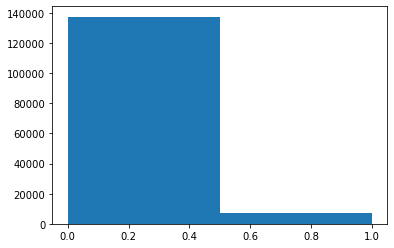

In [531]:
plt.hist(df.fraud, bins = 2)


(-10.0, 800.0)

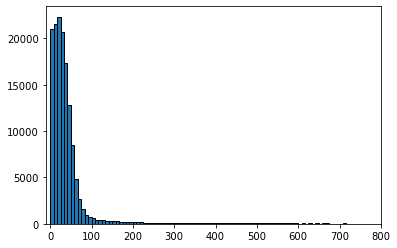

In [532]:
plt.hist(df.amount, bins = 1000, ec = "black", align = 'mid')
plt.xlim(-10 , 800)

# **Manipulating Data**

In [533]:
def pricey(row):
    if row['amount'] <= 50:
        return 'normal'
    elif row['amount'] > 50 and row['amount'] <= 100:
        return 'mid'
    else:
        return 'expensive'

df["Price Ranges"] = df.apply(pricey, axis = 1)

df[['amount', 'Price Ranges']].head()

,amount,Price Ranges
0,44.26,normal
1,324.50,expensive
2,176.32,expensive
3,337.41,expensive
4,220.11,expensive


# **Groupby**

In [534]:
df.groupby(['amount', 'gender'])['customer'].count()

amount   gender
0.00     F'         7
         M'         5
0.01     F'         7
         M'        13
0.02     F'         7
                   ..
7403.44  M'         1
7432.48  F'         1
7635.41  F'         1
7665.56  F'         1
8329.96  M'         1
Name: customer, Length: 26123, dtype: int64

In [535]:
df.groupby(['zipcodeOri'])['customer'].count()

zipcodeOri
28007'    144636
Name: customer, dtype: int64

# **checking for Missing data**

In [536]:
df.isna().any()[lambda x: x]

Series([], dtype: bool)

 there is only one zipcode so it is not needed for train test
  
 - compare all categories to fraud with pie chart.

validate data incase of overfitting


# **Convert Gender to Number**

In [537]:
def genders(row):
    if row['gender'] == "E'":
        return 1
    elif row['gender'] == "F'":
        return 2
    elif row['gender'] == "M'":
        return 3
    else:
        return 4

df["Gender by Number"] = df.apply(genders, axis = 1)

print("New Gender Labeling E = 1, F = 2, M = 3, U = 4")

df[['gender', 'Gender by Number']].head()

New Gender Labeling E = 1, F = 2, M = 3, U = 4


,gender,Gender by Number
0,M',3
1,M',3
2,M',3
3,M',3
4,F',2


# **Convert Price Ranges to numbers**

In [538]:
def priceRan(row):
    if row['Price Ranges'] == "normal":
        return 1
    elif row['Price Ranges'] == "mid":
        return 2
    elif row['Price Ranges'] == "expensive":
        return 3

df["Price Ranges by Number"] = df.apply(priceRan, axis = 1)

print("New Price Ranges Labeling normal = 1, mid = 2, expensive = 3, U = 4")

df[['Price Ranges', 'Price Ranges by Number']].head()

New Price Ranges Labeling normal = 1, mid = 2, expensive = 3, U = 4


,Price Ranges,Price Ranges by Number
0,normal,1
1,expensive,3
2,expensive,3
3,expensive,3
4,expensive,3


In [539]:
df.groupby('category')['customer'].count()

category
es_barsandrestaurants'      2499
es_contents'                 189
es_fashion'                 1653
es_food'                    3917
es_health'                  4397
es_home'                     758
es_hotelservices'            872
es_hyper'                   2411
es_leisure'                  485
es_otherservices'            569
es_sportsandtoys'           2735
es_tech'                     684
es_transportation'        118418
es_travel'                   636
es_wellnessandbeauty'       4413
Name: customer, dtype: int64

# **Convert Category to numbers**

In [540]:
def categors(row):
    if row['category'] == "es_auto'":
        return 1
    elif row['category'] == "es_barsandrestaurants'":
        return 2
    elif row['category'] == "es_contents'":
        return 3
    elif row['category'] == "es_fashion'":
        return 4
    elif row['category'] == "es_food'":
        return 5
    elif row['category'] == "es_health'":
        return 6
    elif row['category'] == "es_home'":
        return 7
    elif row['category'] == "es_hotelservices'":
        return 8
    elif row['category'] == "es_hyper'":
        return 9
    elif row['category'] == "es_leisure'":
        return 10
    elif row['category'] == "es_otherservices'":
        return 11
    elif row['category'] == "es_sportsandtoys'":
        return 12
    elif row['category'] == "es_tech'":
        return 13
    elif row['category'] == "es_transportation'":
        return 14
    elif row['category'] == "es_travel":
        return 15
    elif row['category'] == "es_wellnessandbeauty'":
        return 16

df["Category by Number"] = df.apply(categors, axis = 1)

df[['category', 'Category by Number']].head()

,category,Category by Number
0,es_health',6.0
1,es_health',6.0
2,es_hotelservices',8.0
3,es_hotelservices',8.0
4,es_wellnessandbeauty',16.0


# **Change age from characters to digits**

In [541]:
def agist(row):
    if row['age'] == "0'":
        return 0
    elif row['age'] == "1'":
        return 1
    elif row['age'] == "2'":
        return 2
    elif row['age'] == "3'":
        return 3
    elif row['age'] == "4'":
        return 4
    elif row['age'] == "5'":
        return 5
    elif row['age'] == "6'":
        return 6
    else:
        return 7

df["age"] = df.apply(agist, axis = 1)

df['age'].head()

0    3
1    3
2    3
3    3
4    4
Name: age, dtype: int64

# **Show data again.**

In [542]:
df

,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,Price Ranges,Gender by Number,Price Ranges by Number,Category by Number
0,C583110837',3,M',28007',M480139044',28007',es_health',44.26,1,normal,3,1,6.0
1,C1332295774',3,M',28007',M480139044',28007',es_health',324.50,1,expensive,3,3,6.0
2,C1160421902',3,M',28007',M857378720',28007',es_hotelservices',176.32,1,expensive,3,3,8.0
3,C966214713',3,M',28007',M857378720',28007',es_hotelservices',337.41,1,expensive,3,3,8.0
4,C1450140987',4,F',28007',M1198415165',28007',es_wellnessandbeauty',220.11,1,expensive,2,3,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144631,C1375103798',3,F',28007',M348934600',28007',es_transportation',56.93,0,mid,2,2,14.0
144632,C1557540123',4,F',28007',M855959430',28007',es_hyper',72.14,0,mid,2,2,9.0
144633,C1201848792',2,F',28007',M855959430',28007',es_hyper',40.12,0,normal,2,1,9.0
144634,C1089903335',3,M',28007',M1823072687',28007',es_transportation',10.90,0,normal,3,1,14.0


# **More Data Visualizations**

#   Pie Charts

In [543]:
df.groupby(['fraud', 'gender'])['customer'].count()

fraud  gender
0      E'          225
       F'        74884
       M'        62190
       U'          137
1      E'            7
       F'         4758
       M'         2435
Name: customer, dtype: int64

Gender composition of Fruad


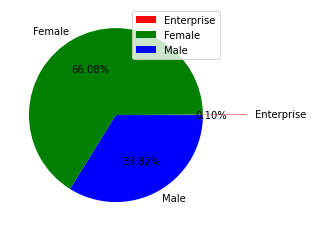

In [544]:
print("Gender composition of Fruad")
parts = ['Enterprise', 'Female', 'Male']
slices = [7,4758,2435]
color = ['r', 'g', 'b']
plt.pie(slices, labels = parts, colors = color,explode=(.5, 0, 0), autopct = '%1.2f%%')
plt.legend()
plt.show()

In [545]:
df.groupby(['fraud', 'category'])['customer'].count()

fraud  category              
0      es_barsandrestaurants'      2379
       es_contents'                 189
       es_fashion'                 1537
       es_food'                    3917
       es_health'                  2701
       es_home'                     456
       es_hotelservices'            324
       es_hyper'                   2131
       es_leisure'                   11
       es_otherservices'            341
       es_sportsandtoys'            753
       es_tech'                     526
       es_transportation'        118418
       es_travel'                    58
       es_wellnessandbeauty'       3695
1      es_barsandrestaurants'       120
       es_fashion'                  116
       es_health'                  1696
       es_home'                     302
       es_hotelservices'            548
       es_hyper'                    280
       es_leisure'                  474
       es_otherservices'            228
       es_sportsandtoys'           1982
       es_

Category composition of Fraud


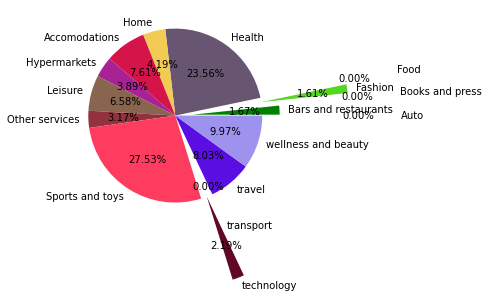

In [546]:
print("Category composition of Fraud")
parts = ['Auto', 'Bars and restaurants', 'Books and press' , 'Fashion',
'Food', 'Health', 'Home', 'Accomodations', 'Hypermarkets', 'Leisure', 'Other services',
'Sports and toys', 'technology', 'transport', 'travel', 'wellness and beauty']
slices = [0,120,0,116,0,1696,302,548,280,474,228,1982,158,0,578,718]
color = ['r', 'g', 'b', '#55d621', '#0c2f48', '#685572', '#f2cb54', '#d51549', '#a82195', '#89644f', '#91323d', '#fd3c60', '#610924', '#00cbf2', '#5a0ee1', '#9d93ef']
plt.pie(slices, labels = parts, colors = color, explode = (1.5,0.2,1.5,1,1.5,0,0,0,0,0,0,0,1,0.3,0,0), autopct = '%1.2f%%')
plt.show()

In [547]:
df.groupby(['fraud', 'age'])['customer'].count()

fraud  age
0      0        488
       1      13692
       2      43703
       3      33495
       4      24916
       5      14751
       6       6166
       7        225
1      0         48
       1        689
       2       2344
       3       1755
       4       1410
       5        686
       6        261
       7          7
Name: customer, dtype: int64

Age composition of Fraud


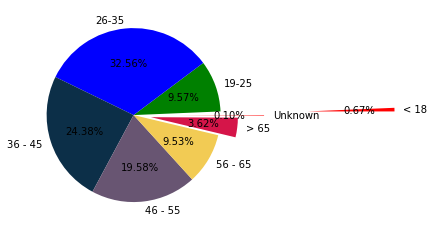

In [548]:
print("Age composition of Fraud")

parts = ['< 18', '19-25', '26-35', '36 - 45', '46 - 55', '56 - 65', '> 65', 'Unknown']
slices = [48, 689, 2344, 1755, 1410, 686, 261, 7]
color = ['r', 'g', 'b', '#0c2f48', '#685572', '#f2cb54', '#d51549']
plt.pie(slices, labels = parts, colors = color, explode=(2, 0, 0, 0, 0, 0, 0.2, 0.5), autopct = '%1.2f%%')
plt.show()

In [549]:
df.groupby(['fraud', 'Price Ranges'])['customer'].count()

fraud  Price Ranges
0      expensive         3397
       mid              18810
       normal          115229
1      expensive         6061
       mid                550
       normal             589
Name: customer, dtype: int64

Price composition of pie chart


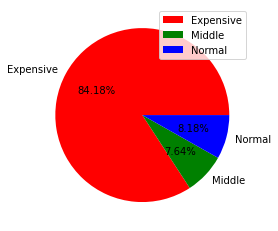

In [550]:
print("Price composition of pie chart")
parts = ['Expensive', 'Middle', 'Normal']
slices = [6061,550,589]
color = ['r', 'g', 'b']
plt.pie(slices, labels = parts, colors = color,explode=(0, 0, 0), autopct = '%1.2f%%')
plt.legend()
plt.show()

# **Split the dataset into training and testing**

In [551]:
#show column names
for i in range(len(df.columns)):
    print(df.columns[i])

customer
age
gender
zipcodeOri
merchant
zipMerchant
category
amount
fraud
Price Ranges
Gender by Number
Price Ranges by Number
Category by Number


In [0]:
#x_train = x_train[~np.isnan(x_train).any(axis=1)]
#x_test = x_test[~np.isnan(x_test).any(axis=1)]
#y_train = y_train[~np.isnan(y_train).any(axis=1)]
#y_test = y_test[~np.isnan(y_test).any(axis=1)]

In [594]:
df = df.dropna()

In [595]:
independent = df.iloc[0:,[1, 10, 11, 12]].values
independent 

array([[ 3.,  3.,  1.,  6.],
       [ 3.,  3.,  3.,  6.],
       [ 3.,  3.,  3.,  8.],
       ...,
       [ 2.,  2.,  1.,  9.],
       [ 3.,  3.,  1., 14.],
       [ 1.,  2.,  1., 14.]])

In [596]:
dependent = df.iloc[0:,[8]].values
dependent

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [597]:
x_train,x_test,y_train,y_test = train_test_split(independent, dependent, test_size = 0.2, random_state=42)

In [598]:
x_train

array([[ 2.,  2.,  1., 14.],
       [ 5.,  3.,  1., 14.],
       [ 3.,  2.,  1., 14.],
       ...,
       [ 2.,  2.,  1., 14.],
       [ 2.,  3.,  1., 14.],
       [ 4.,  2.,  1., 14.]])

In [599]:
x_test

array([[ 3.,  2.,  1., 14.],
       [ 4.,  2.,  1., 14.],
       [ 4.,  3.,  1., 14.],
       ...,
       [ 3.,  3.,  1., 14.],
       [ 5.,  3.,  1.,  9.],
       [ 3.,  2.,  3.,  6.]])

In [557]:
#stndrd = StandardScaler()
#x_train = stndrd.fit_transform(x_train)

In [558]:
#x_test = stndrd.fit_transform(x_test)

In [600]:
x_train

array([[ 2.,  2.,  1., 14.],
       [ 5.,  3.,  1., 14.],
       [ 3.,  2.,  1., 14.],
       ...,
       [ 2.,  2.,  1., 14.],
       [ 2.,  3.,  1., 14.],
       [ 4.,  2.,  1., 14.]])

In [601]:
x_test

array([[ 3.,  2.,  1., 14.],
       [ 4.,  2.,  1., 14.],
       [ 4.,  3.,  1., 14.],
       ...,
       [ 3.,  3.,  1., 14.],
       [ 5.,  3.,  1.,  9.],
       [ 3.,  2.,  3.,  6.]])

In [561]:
#for i in range(len(x_train)):
 #       x_train[i] = x_train[i][numpy.logical_not(numpy.isnan(x_train[i]))]

In [602]:
numpy.set_printoptions(threshold=10)
x_train

array([[ 2.,  2.,  1., 14.],
       [ 5.,  3.,  1., 14.],
       [ 3.,  2.,  1., 14.],
       ...,
       [ 2.,  2.,  1., 14.],
       [ 2.,  3.,  1., 14.],
       [ 4.,  2.,  1., 14.]])

In [603]:
lr = LogisticRegression(random_state = 42)


In [604]:
#fit the model 
lr.fit(x_train, y_train)

/usr/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [606]:
#getting predictions using model

y_predict = lr.predict(x_test)

In [607]:
#getting accuracy using model scoring

lr.score(x_test, y_test)

0.9676388888888889

In [622]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_predict)
print(score)

0.9676388888888889


In [624]:
print(f'Baseline accuracy score {round(score*100, 0)}%')

Baseline accuracy score 97.0%


In [626]:
# Show the Confusion Matrix
cmatr = confusion_matrix(y_test, y_predict)
TP = cmatr[0][0]
TN = cmatr[1][1]
FP = cmatr[0][1]
FN = cmatr[1][0]

print("True Positive =", TP, "out of", len(y_predict), "Which is", TP/len(y_predict)*100)
print("True Negative =", TN, "out of", len(y_predict), "Which is", TN/len(y_predict)*100)
print("False Positive =", FP, "out of", len(y_predict), "Which is", FP/len(y_predict)*100)
print("False Negative =",FN, "out of" , len(y_predict), "Which is", FN/len(y_predict)*100)


True Positve = 26833 out of 28800 Which is 93.17013888888889
True Negative = 1035 out of 28800 Which is 3.5937499999999996
False Positve = 632 out of 28800 Which is 2.194444444444444
False Negative = 300 out of 28800 Which is 1.0416666666666665


In [633]:
print(lr.coef_)
print()
print(["age", "Gender", "Price Ranges", "Category"])

[[-0.03484407 -0.40460396  3.0626623  -0.04032286]]

['age', 'Gender', 'Price Ranges', 'Category']


A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

Which means as age is in the lower categories the chances of fraud increases

Which means as Gender decrease [E, F, M, G] - that leans more towards female as scene in the data visualization that showed in the data that more customers labeled as female had fraudlent transactions

Which means that as the price increases the chance of the transaction being fraudelent increases

Finally it means that as the transaction enters the later categories of around 'Sports and toys', 'technology', 'transport', 'travel', 'wellness and beauty the transaction may be fraud.


# **Discussion Questions**

**Discussion in the your project notebook (add a text cell and answer the following questions):**

**Question**

A. Describe your dataset.  
1. How many rows are there? 
2. What are the names of some interesting columns?
3. Which data type are the columns?

**Answer**

1. 594645 rows

2. The fraud column is interesting because the data is meant to help with fraud detection but it's probably about 1-5% of the data that's fraud.

3. There are two data sets and combined there are 10 string columns, 3 Integer columns and 2 Decimal columns.

**Question**

B. What are a few predictions you would like to investigate?

**Answer**

Some predictions I would like to investigate are 

a. If certain age or gender demographics buying products can be good indicators for fraud

b. If purchases that are too far from each other in a short amount of time can indicate fruad.

**Question**

C. What do your initial data visualizations tell you about your data?

**Answer**

A lot of the purchases are within 0 - 100 euros

**Question**

D. What inconsistencies do you notice in your data? 

**Answer**

None were noticed

**Question**

E. What are other columns (“features”) you would like to add to your data?

**Answer**

average amount of money spent in the 16 goods categories

average amount of money spent in a zipcode

# **Phase 2 Discussion Questions**

**Summarize the data preparation techniques and steps your team applied to your data**

    We removed the extra data we didin't need. 

**What additional work does your team need to do in order to fully prepare your data?**

    none honestly.

# **Phase 3 Discussion Questions**

**Describe the data in words?**

A list of different transactions with descriptions of the customer and the merchant used to determine if the transaction is fraudulent.


---


**What is important to you about this dataset? What do you want the reader to take-away from looking at this visualization?**

What factors would most likely lead to a transaction being labled as fraudulent.


---

**What visualization decisions did you make that are driven by the takeaway message? (scale, colors, mark type, text, lines to show thresholds, annotations, how data was grouped, etc)**
I used pie charts in order to see what different values in a category where determined to be in a fraudulent transaction.

---

**Data is never "pure"; it always comes from somewhere. Is there anything you think is important to note about what might not have been captured in the dataset?**

overall economic health of where the data was synthesized is not mentioned at all in the data description, which may make the data unreliable because the health of the economy can effect the number of fraudulent transactions


# **Phase 4 Discussion Questions**

**How are you evaluating the performance of your implementation?**

Based on if it can identify fraud in the testing model and how many times it can identify such fraud.


---


**What is your reasoning for taking this approach?**

since it is a fraud detector it makes sense that it a good test performance evaluation is the ability to serve its purpose.